In [1]:
import pandas as pd
import os
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nltk.download('punkt')
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from datetime import datetime
import pickle as pickle
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report,confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_score
from ipynb.fs.full.accuracy_check import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

[nltk_data] Downloading package punkt to /home/bjit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/bjit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def get_ngrams(text,n):
    '''
        function for tokenization
    '''
    text = re.split(r"\W+",str(text))
    text = " ".join(text)
    tokens = nltk.word_tokenize(text)
    joined_text = " ".join(tokens)
    return joined_text

In [3]:
def apply_cleaning_function_to_list(X):
    '''
        apply clean data
    '''
    cleaned_X = []
    for element in X:
        cleaned_X.append(get_ngrams(element,1))
    return cleaned_X

In [4]:
def get_data(data_path="final__csv.csv"):
    '''
        import dataset
    '''
    my_file = pd.read_csv(data_path)
    my_file = my_file.sample(frac=1)
    my_file['URL'] = my_file['URL'].str.lower()
    print(my_file.head())
    my_file['clean_url'] = apply_cleaning_function_to_list(my_file['URL'])
    return my_file['URL'], my_file['clean_url'], my_file['Class']

In [5]:
def get_train_test_data(cleaned_url, classes):
    '''
        train and test set split
    '''
    X_train, X_test, y_train, y_test = train_test_split(cleaned_url, classes, test_size=0.20, stratify = classes)
    return X_train, X_test, y_train, y_test

In [6]:
def get_train_valid_data(X_train, y_train):
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.10, stratify = y_train)
    
    return X_train, X_valid, y_train, y_valid

In [7]:
def save_all_feature_data(path, data):

    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, 'wb') as output:
        pickle.dump(data, output)

In [8]:
def feature_extraction_using_tfidf(X_train, y_train, X_valid, y_valid,X_test,n1,n2):
    '''
        tf idf feature extraction with n gram range
    '''
    tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1))
    tfidf.fit(X_train)
    features_train =  tfidf.transform(X_train)
    labels_train = y_train
    features_test = tfidf.transform(X_valid)
    labels_test = y_valid
    X_test = tfidf.transform(X_test)
    
    # current date and time
    now = datetime.now()

    timestamp = datetime.timestamp(now)
    print("timestamp =", timestamp)
    
    features_train_data_path = 'Pickles/features_train_'+str(timestamp).replace(".", "_")+'.pickle'
    save_all_feature_data(features_train_data_path, features_train)
    
    features_test_data_path = 'Pickles/features_test_'+str(timestamp)+'.pickle'
    save_all_feature_data(features_test_data_path, features_test)
    
    labels_train_data_path = 'Pickles/labels_train_'+str(timestamp)+'.pickle'
    save_all_feature_data(labels_train_data_path, labels_train)
    
    labels_test_data_path = 'Pickles/labels_test_'+str(timestamp)+'.pickle'
    save_all_feature_data(labels_test_data_path, labels_test)
    
    return features_train, features_test, labels_train, labels_test, X_test


In [9]:
def fit_model(model, features_train, features_test, y_train,X_test):
    '''
        function to fit the model
        
    '''
    fitted_model = model.fit(features_train, y_train)
    predictions = model.predict(features_test)
    predictions_test = model.predict(X_test)
    return predictions, fitted_model, predictions_test

In [10]:
def get_predictions(model_name, features_train, features_test, y_train, X_test, algorithm='SAMME.R',n_estimators=50,learning_rate=1.0):
    '''
        All ML clasification model 
    '''
    if model_name == "LogisticRegression":
        model = linear_model.LogisticRegression()
        return fit_model(model, features_train, features_test, y_train, X_test)
    if model_name == "MultinomialNB":
        model = MultinomialNB()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "BernoulliNB":
        model = BernoulliNB()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "SVC":
        model = svm.SVC()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "LinearSVC":
        model = LinearSVC()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "KNeighborsClassifier":
        model = KNeighborsClassifier(n_neighbors = 7)
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "RandomForestClassifier":
        model = RandomForestClassifier()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "XGBClassifier":
        model = XGBClassifier()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "SGDClassifier":
        model = SGDClassifier()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "Baggingclassifier":
        model = BaggingClassifier(base_estimator=None)
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "Adaboostclassifier":
        model = AdaBoostClassifier(algorithm=algorithm,n_estimators=n_estimators, learning_rate=learning_rate)
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "GradientBoostingClassifier":
        model = GradientBoostingClassifier()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(criterion="gini",random_state=0)
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "NearestCentroid":
        model = NearestCentroid()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model_name == "NuSVC":
        model = NuSVC()
        return fit_model(model, features_train, features_test, y_train,X_test)
    if model == "All":
        return get_LogisticRegression_predictions()

In [11]:
def get_result(predictions, y_valid):
    '''
        get the result
    '''
    print('Accuracy: ',accuracy_score(labels_test, predictions))
    print('Precision score: ', precision_score(y_valid, predictions))
    print('Recall score: ', recall_score(y_valid, predictions))
    print('f1 score: ',  f1_score(y_valid, predictions))

In [12]:
def get_result_using_cv(model, features_train, y_train, labels_test, predictions, cv=3):
    '''
        k fold cross validation
    '''
    lr_tfidf_cv_scores = cross_val_score(model, features_train, y_train, cv=cv)
    lr_tfidf_cv_mean_score = np.mean(lr_tfidf_cv_scores)
    print('CV Accuracy (3-fold):', lr_tfidf_cv_scores)
    print('Mean CV Accuracy:', lr_tfidf_cv_mean_score)
    lr_tfidf_test_score = model.score(features_train, y_train)
    print('Train Accuracy:', lr_tfidf_test_score)
    print('Accuracy: ',metrics.accuracy_score(labels_test, predictions))

In [13]:
n1 = 1
n2 = 4
model_name = "LinearSVC"
url, cleaned_url, classes = get_data()
X_train, X_test, y_train, y_test = get_train_test_data(cleaned_url, classes)
X_train, X_valid, y_train, y_valid = get_train_valid_data(X_train, y_train)
features_train, features_test, labels_train, labels_test, X_test = feature_extraction_using_tfidf(X_train, y_train, X_valid, y_valid,X_test,n1,n2)
predictions, fitted_model ,predictions_test = get_predictions(model_name, features_train, features_test, y_train,X_test)
# get_test_result(predictions_test,y_test)
get_result(predictions, y_valid)
print("+++++++++++++++++++++++++++++++++")
# get_result_using_cv(fitted_model, features_train, y_train, labels_test, predictions, cv=3)

                        URL                Family  Class
38933         xxe0d80f90.im    xxhex_dga_193b9c09      1
12121            ywpzvk.com   goznym_dga_b8612dea      1
22152       uufmjyfqbex.org  pykspa2_dga_ae2063ea      1
28239      mzexmjiwmtia.com   sisron_dga_88bd3e39      1
25633  wudxbduaetpapvphp.su  ranbyus_dga_803f5fb1      1
timestamp = 1597575680.157426
Accuracy:  0.8080855749567406
Precision score:  0.8925820835022295
Recall score:  0.6974976243268927
f1 score:  0.783072546230441
+++++++++++++++++++++++++++++++++


In [14]:
print(get_result(predictions, y_valid))

Accuracy:  0.8080855749567406
Precision score:  0.8925820835022295
Recall score:  0.6974976243268927
f1 score:  0.783072546230441
None


In [15]:
# # try K=1 through K=25 and record testing accuracy
# k_range = range(1, 10)

# # We can create Python dictionary using [] or dict()
# scores = []

# # We use a loop through the range 1 to 26
# # We append the scores in the dictionary
# for k in k_range:
#     model = KNeighborsClassifier(n_neighbors=k)
#     fitted_model = model.fit(features_train, y_train)
#     predictions = model.predict(features_test)
#     scores.append(metrics.accuracy_score(labels_test, predictions))

# print(scores)

In [16]:
# # import Matplotlib (scientific plotting library)
# import matplotlib.pyplot as plt

# # allow plots to appear within the notebook
# %matplotlib inline

# # plot the relationship between K and testing accuracy
# # plt.plot(x_axis, y_axis)
# plt.plot(k_range, scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')

In [17]:
evaluation, cls_report, crosstab= accuracy_chk(labels_train,features_train,labels_test,predictions,fitted_model,model_name,n1,n2)

In [18]:
evaluation

{'Model name': 'LinearSVC',
 'N_Gram Range': [1, 4],
 'Training Set Accuracy': 0.99954551016484,
 'Test Set Accuracy': 0.8080855749567406,
 'Precision score: ': 0.8925820835022295,
 'Recall score: ': 0.6974976243268927,
 'f1 score: ': 0.783072546230441,
 'log loss': 6.62852274580935}

In [19]:
print(cls_report)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      3200
           1       0.89      0.70      0.78      3157

    accuracy                           0.81      6357
   macro avg       0.82      0.81      0.81      6357
weighted avg       0.82      0.81      0.81      6357



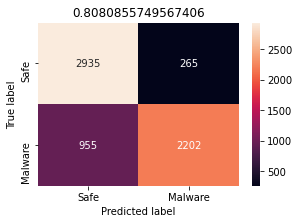

None


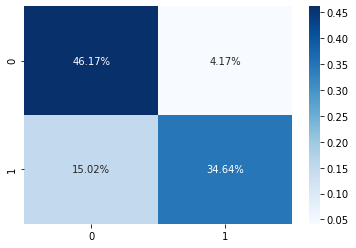

In [20]:
print(get_confusion_matrix(labels_test,predictions))

In [21]:
# # model = linear_model.LogisticRegression()
# # model = MultinomialNB()
# # model = svm.SVC()
# # model = LinearSVC()
# # model = KNeighborsClassifier(n_neighbors=2)
# # model = RandomForestClassifier(n_estimators=200, random_state=0)
# # model = XGBClassifier()
# model = SGDClassifier()

# model.fit(features_train, y_train)
# predictions = model.predict(features_test)

In [22]:
# """
#     test for Adaboostclassifier in cv
# """
# from sklearn.ensemble import AdaBoostClassifier
# model = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=50,learning_rate=1.0)
# model.fit(features_train, y_train)
# predictions = model.predict(features_test)

In [23]:
# """
#     test for Baggingclassifier in cv
# """
# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
# model = BaggingClassifier(base_estimator=None,n_estimators=50, random_state=0)
# model.fit(features_train, y_train)
# predictions = model.predict(features_test)

In [24]:
"""
    test for MultinomialNB() in cv
"""
# model = MultinomialNB()
# model =  model.fit(features_train, y_train)

'\n    test for MultinomialNB() in cv\n'

In [25]:
"""
    GradientBoostingClassifier
"""
# from sklearn.ensemble import GradientBoostingClassifier
# gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
# model =  gbc.fit(features_train, y_train)

'\n    GradientBoostingClassifier\n'

In [26]:
# import numpy as np
# from sklearn.model_selection import cross_val_score
# lr_tfidf_cv_scores = cross_val_score(model, features_train, y_train, cv=3)
# lr_tfidf_cv_mean_score = np.mean(lr_tfidf_cv_scores)
# print('CV Accuracy (3-fold):', lr_tfidf_cv_scores)
# print('Mean CV Accuracy:', lr_tfidf_cv_mean_score)
# lr_tfidf_test_score = model.score(features_train, y_train)
# print('Test Accuracy:', lr_tfidf_test_score)
# print('Accuracy: ',metrics.accuracy_score(labels_test, predictions))

In [27]:
# pd.crosstab(y_valid , predictions)

In [28]:
New_URL = pd.Series(['www.facebook.com'])

In [29]:
New_URL

0    www.facebook.com
dtype: object

In [30]:
# predictions = model.predict(features_test)

NameError: name 'model' is not defined

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
!pip freeze > requirements_latest.txt